## Importing necessory libraries

In [191]:
# Dataframe manipulation and analysis libraries
import pandas as pd 
import numpy as np

#Data visualisation libaries
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sci 

#Library to filter warnings
import warnings
warnings.filterwarnings('ignore')

#Data Pre-Processing Libraries
from sklearn.preprocessing import LabelEncoder,StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import RFE

# Feature Decomposition Library
from sklearn.decomposition import PCA

#Data Preparation Libraries
from sklearn.model_selection import train_test_split,KFold,cross_val_score,RandomizedSearchCV

#Model Evalation Libraries
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

#Machine Learning Model
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.cluster import KMeans

# Multi-Collinearity Test Package
from statsmodels.stats.outliers_influence import variance_inflation_factor

## Loading Dataset

In [192]:
df1 = pd.read_excel('Medibuddy insurance data personal details (1) (2).xlsx')
df1.head()

,Policy no.,children,smoker,region
0,PLC157006,0,no,southwest
1,PLC157033,1,no,southwest
2,PLC157060,0,no,southwest
3,PLC157087,1,no,southwest
4,PLC157186,5,no,southwest


In [193]:
df1.shape

(1338, 4)

In [194]:
df2 = pd.read_csv('Medibuddy Insurance Data Price (1) (2).csv')
df2.head()

,Policy no.,age,sex,bmi,charges in INR
0,PLC156898,19,female,27.900,16884.92400
1,PLC156907,18,male,33.770,1725.55230
2,PLC156916,28,male,33.000,4449.46200
3,PLC156925,33,male,22.705,21984.47061
4,PLC156934,32,male,28.880,3866.85520


In [195]:
df2.shape

(1338, 5)

In [196]:
# merge two datsets and dropping policy no.
df = pd.merge(df1,df2)
df = df.drop(['Policy no.'],axis=1)
df.head()

,children,smoker,region,age,sex,bmi,charges in INR
0,0,no,southwest,23,male,34.4,1826.843
1,1,no,southwest,19,male,24.6,1837.237
2,0,no,southwest,56,male,40.3,10602.385
3,1,no,southwest,30,female,32.4,4149.736
4,5,no,southwest,19,female,28.6,4687.797


## Problem Statement

- There are two datasets, one having the age and BMI(Body Mass Index) that is received from a pre health checkup before the policy cover; and the other dataset includes some personal details such as the no. of children, whether the person smokes or not, the location where the person is from etc.

- Build a machine learning model to predict the amount spent to the utmost accuracy. Validate and hyper parametrically tune the model to get the best results.

## EDA (Exploratory Data Analysis)

In [197]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   children        1338 non-null   int64  
 1   smoker          1338 non-null   object 
 2   region          1338 non-null   object 
 3   age             1338 non-null   int64  
 4   sex             1338 non-null   object 
 5   bmi             1338 non-null   float64
 6   charges in INR  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


Obseravations :
1. Dataset contain 8 columns and 1338 reccords
2. 3 columns are have string datatype and 5 columns of numeric datatype.
3. Dataset not  have any Null Values

In [198]:
df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [199]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [200]:
df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

Observation :
1. There are three catagorical features smoker,region,sex
2. smoker has two catagory yes and no
3. region has four catagory southeast,southwest,northwest,northeast
4. sex has two catagory male and female.

### Encoding Catagorical Feature

In [201]:
df['sex'] = df['sex'].replace({'female':0,'male':1})
df['smoker'] = df['smoker'].replace({'no':0,'yes':1})
df = pd.get_dummies(df,columns = ['region'])

In [202]:
df

,children,smoker,age,sex,bmi,charges in INR,region_northeast,region_northwest,region_southeast,region_southwest
0,0,0,23,1,34.400,1826.84300,0,0,0,1
1,1,0,19,1,24.600,1837.23700,0,0,0,1
2,0,0,56,1,40.300,10602.38500,0,0,0,1
3,1,0,30,0,32.400,4149.73600,0,0,0,1
4,5,0,19,0,28.600,4687.79700,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
1333,1,1,39,1,29.925,22462.04375,1,0,0,0
1334,0,1,18,0,21.660,14283.45940,1,0,0,0
1335,2,1,42,1,24.605,21259.37795,1,0,0,0
1336,0,1,29,0,21.850,16115.30450,1,0,0,0


### Descriptive Analysis

In [203]:
df.describe()

,children,smoker,age,sex,bmi,charges in INR,region_northeast,region_northwest,region_southeast,region_southwest
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,1.094918,0.204783,39.207025,0.505232,30.663397,13270.422265,0.242152,0.242900,0.272048,0.242900
std,1.205493,0.403694,14.049960,0.500160,6.098187,12110.011237,0.428546,0.428995,0.445181,0.428995
min,0.000000,0.000000,18.000000,0.000000,15.960000,1121.873900,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,27.000000,0.000000,26.296250,4740.287150,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,39.000000,1.000000,30.400000,9382.033000,0.000000,0.000000,0.000000,0.000000
75%,2.000000,0.000000,51.000000,1.000000,34.693750,16639.912515,0.000000,0.000000,1.000000,0.000000
max,5.000000,1.000000,64.000000,1.000000,53.130000,63770.428010,1.000000,1.000000,1.000000,1.000000


Observations :
1. Charges in INR and Smoker may have outlier because mean and median are not same.
2. Charges in INR and Smoker  might have outlier on upper region.

## Building Custom Summery function for indepth EDA report

In [204]:
def custom_summary(mydf):
    cols = []
    for i in df.columns:
        if mydf[i].dtype != object:
            cols.append(i)
    result = pd.DataFrame(columns = cols,index=['datatype','count','min','Q1','Q2','Q3','Max','Mean','stddev','skew','kurt','range','IQR','skew_comment','kurt_comment','outlier_comment'])
    for i in result.columns:
        result.loc['datatype',i] = mydf[i].dtype
        result.loc['count',i] = mydf[i].count()
        result.loc['min',i] = mydf[i].min()
        result.loc['Q1',i] = mydf[i].quantile(0.25)
        result.loc['Q2',i] = mydf[i].quantile(0.50)
        result.loc['Q3',i] = mydf[i].quantile(0.75)
        result.loc['Max',i] = mydf[i].quantile(1)
        result.loc['Mean',i] = round(mydf[i].mean(),2)
        result.loc['stddev',i] = round(mydf[i].std(),2)
        result.loc['skew',i] = round(mydf[i].skew(),2)
        result.loc['kurt',i] = round(mydf[i].kurt(),2)
        result.loc['range',i] = mydf[i].quantile(1)-mydf[i].min()
        result.loc['IQR',i] = mydf[i].quantile(0.75)-mydf[i].quantile(0.25)
        
        #Adding Comments for skewness
        if result.loc['skew',i] < -1:
            sk_label = 'Highly negatively skewed'
        elif -1 < result.loc['skew',i] <= -0.5:
            sk_label = 'Moderately negatively skewed'
        elif -0.5 < result.loc['skew',i] <= 0:
            sk_label = 'Approximately normally distributed(-ve)'
        elif 0 < result.loc['skew',i] <= 0.5:
            sk_label = 'Approximately normally distributed(+ve)'
        elif 0.5 < result.loc['skew',i] <= 1:
            sk_label = 'Moderately Positively Skewd'
        elif result.loc['skew',i] > 1:
            sk_label = 'Highly Positively Skewd'
        else:
            sk_label = 'error'
        result.loc['skew_comment',i] = sk_label
        
        #Adding Comments for Kurtosis
        if result.loc['kurt',i] < -1:
            ku_label = 'Highly Platykurtic'
        elif -1 < result.loc['kurt',i] <= -0.5:
            ku_label = 'Moderately Platykurtic'
        elif -0.5 < result.loc['kurt',i] <= 0.5:
            ku_label = 'Mesokurtic'
        elif 0.5 < result.loc['kurt',i] <= 1:
            ku_label = 'Moderately Leptokurtic'
        elif result.loc['kurt',i] > 1:
            ku_label = 'Highly Leptokurtic'
        else:
            ku_label = 'error'
        result.loc['kurt_comment',i] = ku_label
        
        #adding comments for outliers
        LW = result.loc['Q1',i] - (1.5*result.loc['IQR',i])
        UW = result.loc['Q3',i] + (1.5*result.loc['IQR',i])
        
        if len([x for x in mydf[i] if x < LW or x> UW]) > 0:
            outlier_lable = "Have Outliers"
        else:
            outlier_lable = "No Outliers"
            
        result.loc['outlier_comment',i] = outlier_lable
        
    return result

In [205]:
custom_summary(df)

,children,smoker,age,sex,bmi,charges in INR,region_northeast,region_northwest,region_southeast,region_southwest
datatype,int64,int64,int64,int64,float64,float64,uint8,uint8,uint8,uint8
count,1338,1338,1338,1338,1338,1338,1338,1338,1338,1338
min,0,0,18,0,15.96,1121.8739,0,0,0,0
Q1,0.0,0.0,27.0,0.0,26.29625,4740.28715,0.0,0.0,0.0,0.0
Q2,1.0,0.0,39.0,1.0,30.4,9382.033,0.0,0.0,0.0,0.0
Q3,2.0,0.0,51.0,1.0,34.69375,16639.912515,0.0,0.0,1.0,0.0
Max,5.0,1.0,64.0,1.0,53.13,63770.42801,1.0,1.0,1.0,1.0
Mean,1.09,0.2,39.21,0.51,30.66,13270.42,0.24,0.24,0.27,0.24
stddev,1.21,0.4,14.05,0.5,6.1,12110.01,0.43,0.43,0.45,0.43
skew,0.94,1.46,0.06,-0.02,0.28,1.52,1.21,1.2,1.03,1.2


Analysis :
- we have outlier in smoker, bmi and charges in INR,region_northeast,region_northwest,region_southwest.

## Checkig for outlier using boxplot

In [206]:
def replace_outlier(mydf,col,method = 'Quartile', stratergy = 'median'):
    if method == 'Quartile':
        Q1 = mydf[col].quantile(0.25)
        Q2 = mydf[col].quantile(0.50)
        Q3 = mydf[col].quantile(0.75)
        IQR = Q3 - Q1
        LW = Q1 - (1.5 * IQR)
        UW = Q3 + (1.5 * IQR)
    elif method == 'std':
        mean = mydf[col].mean()
        std = mydf[col].std()
        LW = mean - (2 * std)
        UW = mean + (2 * std)
    else:
        print('Pass a corect method')
        
    #printing all the outliers 
    outliers = mydf.loc[(mydf[col] < LW) | (mydf[col] > UW),col]
    outliers_density = round(len(outliers) / len(mydf),2)
    if len(outliers) == 0:
        print(f'feature {col} does not have any outliers')
    else:
        print(f'feature {col} has otliers')
        print(f'total no of outliers in {col} is {len(outliers)}')
        print(f'outliers percentage in {col} is {outliers_density*100}%')
    
    if stratergy == 'median':
        mydf.loc[(mydf[col] < LW), col] = Q1 
        mydf.loc[(mydf[col] > UW), col] = Q3 
    elif stratergy == 'mean':
        mydf.loc[(mydf[col] < LW), col] = mean 
        mydf.loc[(mydf[col] > UW), col] = mean
    else:
        print('pass the correct stratergy')
        
    return mydf

In [207]:
def odt_plots(mydf,col):
    f,(ax1,ax2) = plt.subplots(1,2,figsize=(25,8))
    #discriptive statistics box plot
    sns.boxplot(mydf[col],ax = ax1)
    ax1.set_title(col + ' boxplot')
    ax1.set_xlabel('values')
    ax1.set_ylabel('boxplot')
    #replacing the outliers
    mydf_out = replace_outlier(mydf,col)
    #plotting box plot without outliers
    sns.boxplot(mydf_out[col],ax = ax2)
    ax2.set_title(col + ' boxplot')
    ax2.set_xlabel('values')
    ax2.set_ylabel('boxplot')
    plt.show()

feature bmi has otliers
total no of outliers in bmi is 9
outliers percentage in bmi is 1.0%


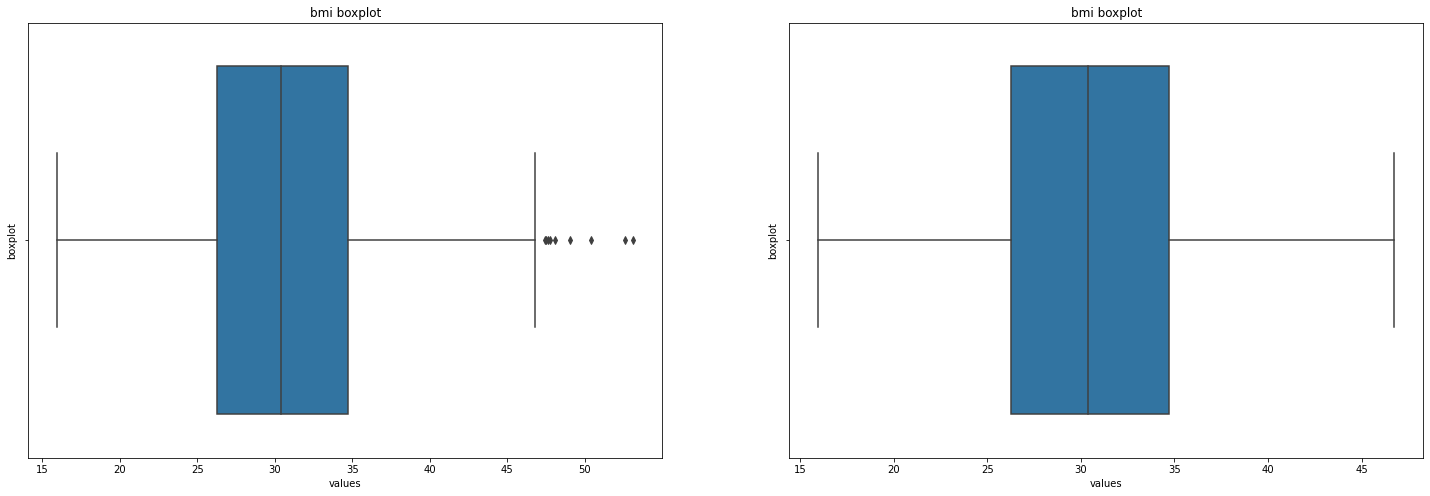

In [208]:
#We are treating only bmi column for outliers as other features that has outliers contains 0 and 1 only.
odt_plots(df,'bmi')

In [209]:
df['smoker'].value_counts()

0    1064
1     274
Name: smoker, dtype: int64

## Multivariate analysis using Regression

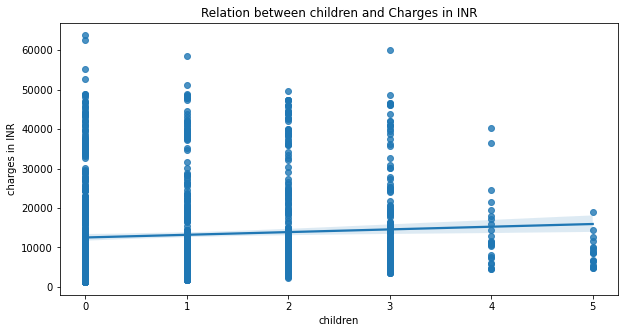

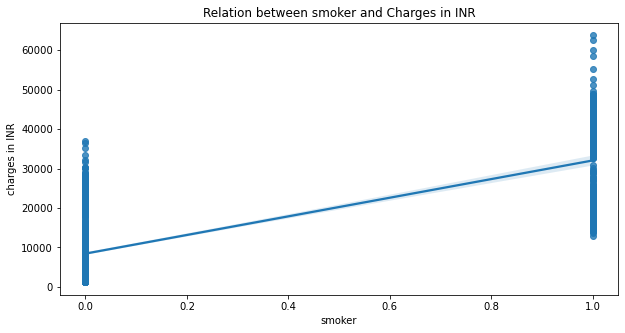

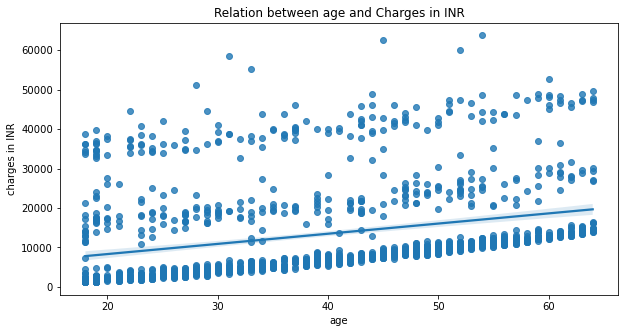

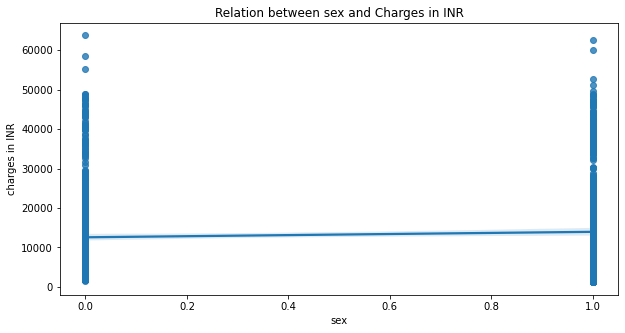

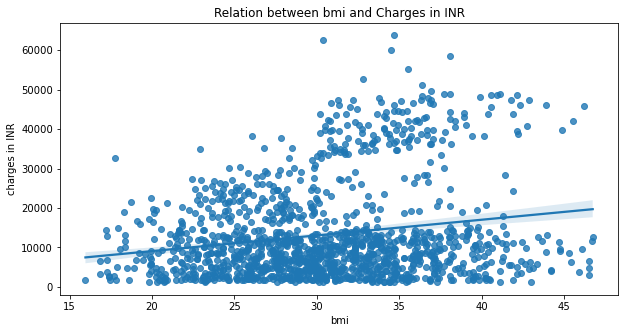

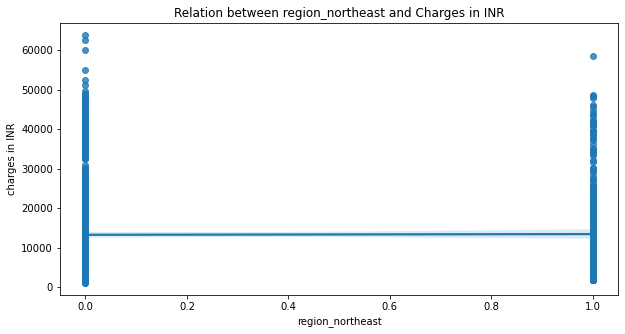

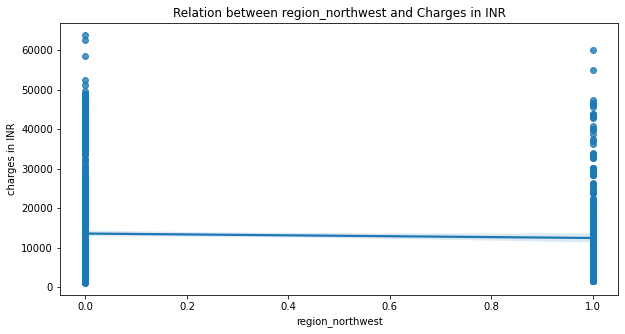

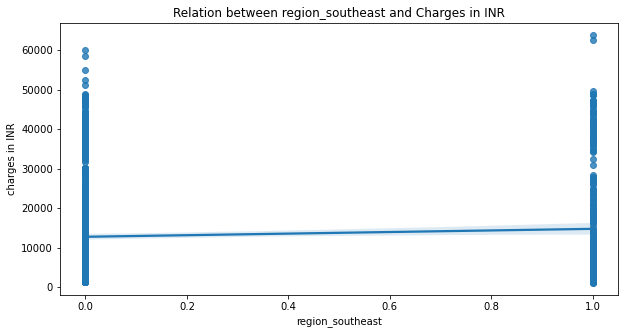

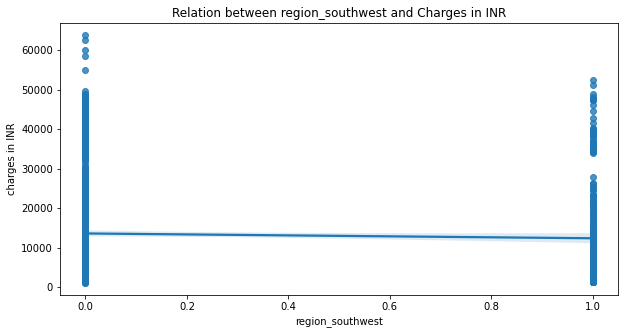

In [210]:
for col in df.columns:
    if col != 'charges in INR':
        fig,ax1 = plt.subplots(figsize = (10,5))
        sns.regplot(x = df[col] , y = df['charges in INR'],ax = ax1).set_title(f'Relation between {col} and Charges in INR')

Analysis :
1. children and charges in INR have mild postive correlation.
2. smoker and charges in INR have strong postive correlation.
3. age and charges in INR have strong postive correlation.
4. sex and charges in INR have mild positive correlation.
5. bmi and charges in INR have strong postive correlation.
6. charges in INR and region_northEast has a very Mild Negative Correlation.
7. charges in INR and region_northWest has a very Mild Negative Correlation.
8. charges in INR and region_sothEast has a very Mild Positive Correlation.
9. charges in INR and region_southWest has a very Mild Negative Correlation.

## Multi-Colineaity Check
- Stage 1 :
    Crrelation HeatMap

<AxesSubplot:>

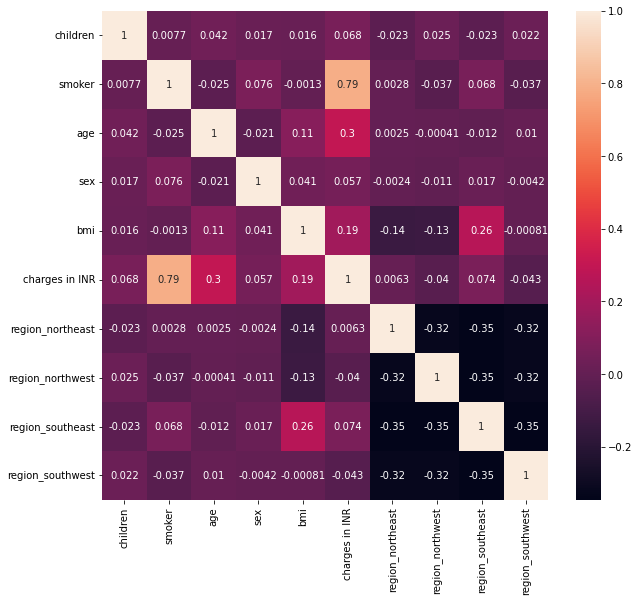

In [211]:
corr = df.corr()
f,ax1 = plt.subplots(figsize = (10,9))
sns.heatmap(corr,annot=True)

Analsis:
- Independent Variable pair with Correlation > 30% are Listed Below -
1. region_northEast and region_northWest  
2. region_northEast and region_southEast
3. region_southEast and region_northWest
4. region_northEast and region_southWest
5. region_southEast and region_southWest
6. region_northWest and region_southWest

- Stage 2 : Variane Inflating Factor(VIF)

  formula for VIF = 1/(1-R2)
    1. Regress every independent variable with each other and find the R2 score 
    2. find out VIF using above formula 
    3. if VIF is more than 5 for any independent variable we can conclude that multi-colinearity exist.

In [212]:
def VIF(independent_variable):
    vif = pd.DataFrame()
    vif['VIF'] = [variance_inflation_factor(independent_variable.values,i) for i in range(independent_variable.shape[1])]
    vif['Independent Variable'] = independent_variable.columns
    return vif.sort_values(by = 'VIF',ascending = False)

In [213]:
VIF(df.drop('charges in INR',axis = 1))

,VIF,Independent Variable
7,11.858856,region_southeast
8,9.552311,region_southwest
6,8.954050,region_northwest
5,8.903818,region_northeast
4,1.101009,bmi
2,1.017887,age
1,1.012210,smoker
3,1.008462,sex
0,1.004111,children


#### Analysis :
- Region_NorthEast,Region_NorthWest,Region_SouthEast and Region_SouthWest have VIF score greater than 5 , so we can conclude that Multi-Collinearity exists

### Correlation with Target Feature

In [214]:
def CWT(data,tcol):
    independent_variables = data.drop(tcol,axis=1).columns
    corr_result = []
    for col in independent_variables :
        corr_result.append(data[tcol].corr(data[col]))
    result = pd.DataFrame([independent_variables,corr_result],index=['independent variables','correlation']).T
    return result.sort_values(by='correlation',ascending = False)

In [215]:
CWT(df,'charges in INR')

,independent variables,correlation
1,smoker,0.787251
2,age,0.299008
4,bmi,0.193789
7,region_southeast,0.073982
0,children,0.067998
3,sex,0.057292
5,region_northeast,0.006349
6,region_northwest,-0.039905
8,region_southwest,-0.04321


Analysis : 
- Smoker,Age and Bmi has high correlation with Charges in INR..

In [216]:
new_df = df.drop('region_northeast',axis = 1)

In [217]:
new_df

,children,smoker,age,sex,bmi,charges in INR,region_northwest,region_southeast,region_southwest
0,0,0,23,1,34.400,1826.84300,0,0,1
1,1,0,19,1,24.600,1837.23700,0,0,1
2,0,0,56,1,40.300,10602.38500,0,0,1
3,1,0,30,0,32.400,4149.73600,0,0,1
4,5,0,19,0,28.600,4687.79700,0,0,1
...,...,...,...,...,...,...,...,...,...
1333,1,1,39,1,29.925,22462.04375,0,0,0
1334,0,1,18,0,21.660,14283.45940,0,0,0
1335,2,1,42,1,24.605,21259.37795,0,0,0
1336,0,1,29,0,21.850,16115.30450,0,0,0


In [218]:
VIF(new_df.drop('charges in INR',axis = 1))

,VIF,Independent Variable
4,11.528058,bmi
2,7.777892,age
6,2.257016,region_southeast
3,2.001986,sex
7,1.966051,region_southwest
5,1.896017,region_northwest
0,1.812080,children
1,1.260953,smoker


Analysis :
- We can see after removing one of the dummy of the region feature still the multicollinearity exists in the dataset. So lets check for PCA to remove multicollinearity.

### Principal Component Analysis (PCA) :

In [219]:
def PCA_1(x):
    n_comp = len(x.columns)
    scalar = StandardScaler()
    x = scalar.fit_transform(x)
    
    # Applying PCA
    
    for i in range(1,n_comp):
        pca = PCA(n_components = i)
        p_comp = pca.fit_transform(x)
        evr = np.cumsum(pca.explained_variance_ratio_)
        if evr[i-1] > 0.9 :
            n_components = i
            break
    print('Explained Variance Ration After PCA is : ',evr)
    
    # Creating PCA Dataframe
    
    col = []
    for j in range(1,n_components + 1):
        col.append('PC_' + str(j))
    pca_df = pd.DataFrame(p_comp,columns = col)
    return pca_df

In [220]:
transformed_details = PCA_1(df.drop('charges in INR',axis = 1))

Explained Variance Ration After PCA is :  [0.17319237 0.32173693 0.46868267 0.58983843 0.70737312 0.81344139
 0.91607595]


In [221]:
transformed_details

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7
0,0.113488,1.578474,-1.086666,1.200381,-0.621793,-0.872263,-1.058820
1,-0.755237,1.528882,-1.022457,1.665872,-0.479668,0.165416,-1.125986
2,0.802038,1.838043,-1.146980,-0.531351,0.494593,-1.985829,-0.369869
3,-0.186410,1.774313,-1.035107,-0.053457,-1.018416,0.503205,0.075038
4,-0.599758,2.056253,-0.860179,0.084852,0.551313,3.438866,-0.699417
...,...,...,...,...,...,...,...
1333,-0.526949,-1.777487,-1.080570,1.146960,1.420141,-0.459679,0.811281
1334,-1.505608,-2.013924,-1.050658,1.674070,-0.947111,0.644367,1.671449
1335,-0.972931,-1.730760,-1.035963,1.108393,1.876926,0.243891,0.833166
1336,-1.428354,-1.950106,-1.067016,1.172064,-0.617825,0.327052,1.932516


### Joining PCA Features with Target Feature

In [222]:
transformed_df = transformed_details.join(df['charges in INR'], how = 'left')
transformed_df.head()

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,charges in INR
0,0.113488,1.578474,-1.086666,1.200381,-0.621793,-0.872263,-1.058820,1826.843
1,-0.755237,1.528882,-1.022457,1.665872,-0.479668,0.165416,-1.125986,1837.237
2,0.802038,1.838043,-1.146980,-0.531351,0.494593,-1.985829,-0.369869,10602.385
3,-0.186410,1.774313,-1.035107,-0.053457,-1.018416,0.503205,0.075038,4149.736
4,-0.599758,2.056253,-0.860179,0.084852,0.551313,3.438866,-0.699417,4687.797


In [223]:
VIF(transformed_df.drop('charges in INR',axis = 1))

,VIF,Independent Variable
2,1.0,PC_3
0,1.0,PC_1
1,1.0,PC_2
3,1.0,PC_4
4,1.0,PC_5
6,1.0,PC_7
5,1.0,PC_6


Analysis :
- VIF < 5 for all feature . there is no multi-colinearity after PCA.

# Model Building 
1. Use Train Test Split
2. Cross Validation
3. Hyper Parameter Tuning

In [224]:
def train_and_test_split(data,tcol,testsize = 0.2):
    x = data.drop(tcol,axis = 1)
    y = data[tcol]
    return train_test_split(x,y,test_size = testsize , random_state = 1)  

In [225]:
def model_builder(model_name,estimator,data,tcol): 
    x_train,x_test,y_train,y_test = train_and_test_split(data,tcol)        
    estimator.fit(x_train,y_train)
    y_pred = estimator.predict(x_test)
    accuracy = r2_score(y_test,y_pred)
    rmse = np.sqrt(mean_squared_error(y_test,y_pred))   
    return [model_name,accuracy,rmse]

In [226]:
model_builder(model_name='Linear Regression',estimator=LinearRegression(),data=transformed_df,tcol='charges in INR')

['Linear Regression', 0.7323373373533726, 6368.807232987507]

In [227]:
def multiple_models(data,t_col):
    col_names=['Model Name','R2 Score','RMSE']
    result = pd.DataFrame(columns = col_names)
    result.loc[len(result)] = model_builder('Linear Regression',LinearRegression(),df,'charges in INR')
    result.loc[len(result)] = model_builder('Decision Tree Regressor',DecisionTreeRegressor(),df,'charges in INR')
    result.loc[len(result)] = model_builder('Lasso',Lasso(),df,'charges in INR')
    result.loc[len(result)] = model_builder('Ridge',Ridge(),df,'charges in INR')
    result.loc[len(result)] = model_builder('K Neighbors Regressor',KNeighborsRegressor(),df,'charges in INR')
    result.loc[len(result)] = model_builder('SVR',SVR(),df,'charges in INR')
    result.loc[len(result)] = model_builder('Random Forest Regressor',RandomForestRegressor(),df,'charges in INR')
    result.loc[len(result)] = model_builder('AdaBoost Regressor',AdaBoostRegressor(),df,'charges in INR')
    result.loc[len(result)] = model_builder('Gradient Boost Regressor',GradientBoostingRegressor(),df,'charges in INR')
    result.loc[len(result)] = model_builder('XGB Regressor',XGBRegressor(),df,'charges in INR')
    
    result1 =result.sort_values(by = 'R2 Score',ascending = False)
    return result1.reset_index(drop=True)

In [228]:
multiple_models(transformed_df,'charges in INR')

,Model Name,R2 Score,RMSE
0,Gradient Boost Regressor,0.828467,5098.448890
1,Random Forest Regressor,0.808043,5393.444739
2,XGB Regressor,0.794496,5580.518648
3,AdaBoost Regressor,0.780572,5766.477853
4,Linear Regression,0.744674,6220.300351
5,Lasso,0.744671,6220.341572
6,Ridge,0.744372,6223.979573
7,Decision Tree Regressor,0.657977,7199.330172
8,K Neighbors Regressor,0.158057,11295.499383
9,SVR,-0.098713,12903.465756


In [229]:
def master_mb(x,y):
    result = []
    list_model = [DecisionTreeRegressor(),Lasso(),Ridge(),SVR(),KNeighborsRegressor(),AdaBoostRegressor(),GradientBoostingRegressor(),RandomForestRegressor(),XGBRegressor()]
    for model in list_model:
        temp_result = model_builder(model_name= type(model).__name__,estimator=model,data= x, tcol= y)
        result.append(temp_result)
    return result        

In [233]:
Master_MB = pd.DataFrame(multiple_models(data = transformed_df, t_col = 'charges in INR'),columns=['Model Names','R2_Score']).sort_values(by=['R2_Score'],ascending = False)
Master_MB = Master_MB.reset_index(drop=True)
Master_MB

,Model Names,R2_Score
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
5,NaN,NaN
6,NaN,NaN
7,NaN,NaN
8,NaN,NaN
9,NaN,NaN


## Cross Validation

In [234]:
def KFoldCV(x,y,fold = 10):
    score_lr = cross_val_score(LinearRegression(),x,y,cv = fold)
    score_las = cross_val_score(Lasso(),x,y,cv = fold)
    score_drt = cross_val_score(DecisionTreeRegressor(),x,y,cv = fold)
    score_rid = cross_val_score(Ridge(),x,y,cv = fold)
    score_knr = cross_val_score(KNeighborsRegressor(),x,y,cv = fold)
    score_svr = cross_val_score(SVR(),x,y,cv = fold)
    score_rfr = cross_val_score(RandomForestRegressor(),x,y,cv = fold)
    score_ada = cross_val_score(AdaBoostRegressor(),x,y,cv = fold)
    score_gb = cross_val_score(GradientBoostingRegressor(),x,y,cv = fold)
    score_xgb = cross_val_score(XGBRegressor(),x,y,cv = fold)
    
    model_names = ['Linear Regression','Decision Tree Regressor','Lasso','Ridge','K Neighbors Regressor','SVR','Random Forest Regressor','AdaBoost Regressor','Gradient Boost Regressor','XGB Regressor']
    scores = [score_lr,score_las,score_drt,score_rid,score_knr,score_svr,score_rfr,score_ada,score_gb,score_xgb]
    result = []
    for i in range(len(model_names)):
        score_mean = np.mean(scores[i])
        score_stdev = np.std(scores[i])
        m_names = model_names[i]
        temp = [m_names,score_mean,score_stdev]
        result.append(temp)
    KFold_df = pd.DataFrame(result,columns = ['Model Name','CV Score','CV Stdev'])   
    KFold_df1 =KFold_df.sort_values(by = 'CV Score',ascending = False)
    
    return KFold_df1.reset_index(drop=True)

In [235]:
kfoldCV(transformed_df.drop('charges in INR',axis=1), transformed_df['charges in INR'])

,model_names,cv_score,cv_std
0,XGBRegressor,0.364382,0.182627
1,Lasso,0.343087,0.205321
2,LinearRegression,0.343060,0.205346
3,Ridge,0.343055,0.205236
4,AdaBoostRegressor,0.340731,0.208341
5,KNeighborsRegressor,0.331102,0.188558
6,SVR,0.331102,0.188558
7,DecisionTreeRegressor,-0.498090,0.867024
8,GradientBoostingRegressor,-0.639413,0.810820
9,RandomForestRegressor,-0.914633,1.802201


## Hyper Parameter Tuning

In [162]:
def tuning(x,y,fold = 10):
    
    # Parameter Grids for Different Models
    
    param_las = {'alpha':[1e-15,1e-13,1e-11,1e-9,1e-7,1e-5,1e-3,1e-1,0,1,2,3,4,5,6,7,8,9,10,20,30,40,50,60,70,80,90,100,200,300,400,500]}
    param_rd = {'alpha':[1e-15,1e-13,1e-11,1e-9,1e-7,1e-5,1e-3,1e-1,0,1,2,3,4,5,6,7,8,9,10,20,30,40,50,60,70,80,90,100,200,300,400,500]}
    param_dtr = {'criterion':['squared_error','friedman_mse','absolute_error','poisson'],'max_depth':[3,5,7,9,11],'max_features':[1,2,3,4,5,6,7,'auto','log2','sqrt']}
    param_knr = {'weights':['uniform','distance'],'algorithm':['auto','ball_tree','kd_tree','brute']}
    param_svr = {'gamma':['scale','auto'],'C':[0.1,1,1.5,2]}
    param_rf = {'max_depth':[3,5,7,9,11],'max_features':[1,2,3,4,5,6,7,'auto','log2','sqrt'],'n_estimators':[50,100,150,200]}
    param_ad = {'n_estimators':[50,100,150,200],'learning_rate':[0.1,0.5,0.7,1,5,10,20,50,100]}
    param_gb = {'n_estimators':[50,100,150,200],'loss':['squared_error','absolute_error','huber','quantile']}
    param_xgb = {'eta':[0.1,0.5,0.7,1,5,10 ,20,50,100],'max_depth':[3,5,7,9,11],'gamma':[0,10,20,50,100],'reg_lambda':[0,1,3,5,7,10],'alpha':[0,1,3,5,7,10]}
    
    # Creating Model Object
    
    tune_las = RandomizedSearchCV(Lasso(),param_las,cv = fold)
    tune_rd = RandomizedSearchCV(Ridge(),param_rd,cv = fold)
    tune_dtr = RandomizedSearchCV(DecisionTreeRegressor(),param_dtr,cv = fold)
    tune_knr = RandomizedSearchCV(KNeighborsRegressor(),param_knr,cv = fold)
    tune_svr = RandomizedSearchCV(SVR(),param_svr,cv = fold)
    tune_rf = RandomizedSearchCV(RandomForestRegressor(),param_rf,cv = fold)
    tune_ad = RandomizedSearchCV(AdaBoostRegressor(),param_ad,cv = fold)
    tune_gb = RandomizedSearchCV(GradientBoostingRegressor(),param_gb,cv = fold)
    tune_xgb = RandomizedSearchCV(XGBRegressor(),param_xgb,cv = fold)
    
    # Model Fitting
    
    tune_las.fit(x,y)
    tune_rd.fit(x,y)
    tune_dtr.fit(x,y)
    tune_knr.fit(x,y)
    tune_svr.fit(x,y)
    tune_rf.fit(x,y)
    tune_ad.fit(x,y)
    tune_gb.fit(x,y)
    tune_xgb.fit(x,y)
    
    tune = [tune_las,tune_rd,tune_dtr,tune_knr,tune_svr,tune_rf,tune_ad,tune_gb,tune_xgb]
    #tune = [tune_knr,tune_ad,tune_xgb]
    models = ['Lasso','Ridge','Decision Tree Regressor','K Neighbors Regressor','SVR','Random Forest Regressor','AdaBoost Regressor','Gradient Boost Regressor','XGB Regressor']
    #models = ['KNN Regressor','AdaBoost Regressor','XGB Regressor']
    for i in range(len(tune)):
        print('Model :',models[i])
        print('Best Params :',tune[i].best_params_)
    

In [164]:
tuning(x = transformed_df.drop('charges in INR',axis=1), y = transformed_df['charges in INR'])

Model : Lasso
Best Params : {'alpha': 80}
Model : Ridge
Best Params : {'alpha': 6}
Model : Decision Tree Regressor
Best Params : {'max_features': 5, 'max_depth': 5, 'criterion': 'friedman_mse'}
Model : K Neighbors Regressor
Best Params : {'weights': 'uniform', 'algorithm': 'ball_tree'}
Model : SVR
Best Params : {'gamma': 'scale', 'C': 2}
Model : Random Forest Regressor
Best Params : {'n_estimators': 200, 'max_features': 3, 'max_depth': 9}
Model : AdaBoost Regressor
Best Params : {'n_estimators': 50, 'learning_rate': 0.5}
Model : Gradient Boost Regressor
Best Params : {'n_estimators': 50, 'loss': 'squared_error'}
Model : XGB Regressor
Best Params : {'reg_lambda': 0, 'max_depth': 3, 'gamma': 20, 'eta': 0.1, 'alpha': 5}


In [165]:
def CV_Post_HPT(x,y,fold = 10):
    score_lr = cross_val_score(LinearRegression(),x,y,cv = fold)
    score_las = cross_val_score(Lasso(alpha = 80),x,y,cv = fold)
    score_drt = cross_val_score(DecisionTreeRegressor(criterion = 'friedman_mse',max_depth = 5,max_features = 5),x,y,cv = fold)
    score_rid = cross_val_score(Ridge(alpha = 6),x,y,cv = fold)
    score_knr = cross_val_score(KNeighborsRegressor(weights = 'uniform',algorithm = 'ball_tree'),x,y,cv = fold)
    score_svr = cross_val_score(SVR(gamma = 'scale',C = 2),x,y,cv = fold)
    score_rfr = cross_val_score(RandomForestRegressor(max_depth = 5,max_features = 4,n_estimators = 50),x,y,cv = fold)
    score_ada = cross_val_score(AdaBoostRegressor(n_estimators = 200,learning_rate = 0.5),x,y,cv = fold)
    score_gb = cross_val_score(GradientBoostingRegressor(n_estimators = 50,loss ='squared_error'),x,y,cv = fold)
    score_xgb = cross_val_score(XGBRegressor(eta =0.1,max_depth = 3,gamma = 20,reg_lambda = 0,alpha = 5),x,y,cv = fold)
    
    model_names = ['Linear Regression','Decision Tree Regressor','Lasso','Ridge','K Neighbors Regressor','SVR','Random Forest Regressor','AdaBoost Regressor','Gradient Boost Regressor','XGB Regressor']
    scores = [score_lr,score_las,score_drt,score_rid,score_knr,score_svr,score_rfr,score_ada,score_gb,score_xgb]
    result = []
    for i in range(len(model_names)):
        score_mean = np.mean(scores[i])
        score_stdev = np.std(scores[i])
        m_names = model_names[i]
        temp = [m_names,score_mean,score_stdev]
        result.append(temp)
    KFold_df = pd.DataFrame(result,columns = ['Model Name','CV Score','CV Stdev']).sort_values(by = 'CV Score',ascending = False)  
    KFold_df = KFold_df.reset_index(drop=True)
    return KFold_df

In [166]:
CV_Post_HPT(x = df.drop('charges in INR',axis=1), y = df['charges in INR'])

,Model Name,CV Score,CV Stdev
0,Gradient Boost Regressor,0.532181,0.184151
1,XGB Regressor,0.517070,0.176627
2,Random Forest Regressor,0.502422,0.182304
3,AdaBoost Regressor,0.393366,0.256108
4,Lasso,0.355292,0.229271
5,Decision Tree Regressor,0.287329,0.130994
6,Linear Regression,0.284420,0.133898
7,Ridge,0.281499,0.140395
8,SVR,-0.889475,1.781446
9,K Neighbors Regressor,-1.234446,1.065258


# Clustering
- Using Clustering to check if it can help us to improve Accuraccy

<AxesSubplot:xlabel='age', ylabel='charges in INR'>

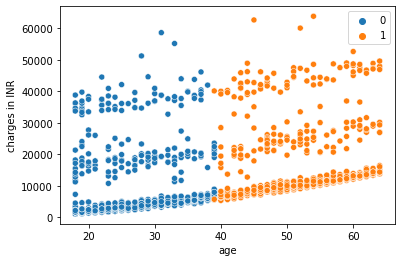

In [167]:
labels = KMeans(n_clusters=2,random_state=42)
cluster = labels.fit_predict(df.drop('charges in INR',axis=1))
sns.scatterplot(x=df['age'],y=df['charges in INR'],hue = cluster)

In [168]:
def clustering(x,tcol,cluster):
    column = list(set(list(x.columns)) - set(list('charges in INR')))
    #column = list(x.columns)
    R = int(len(column)/2) 
    if len(column) % 2 == 0:
        R = R
    else:
        R += 1
    f,ax = plt.subplots(R,2,figsize = (15,15))
    a = 0
    for row in range(R):
        for col in range(2):
            if a != len(column):
                ax[row][col].scatter(x[tcol],x[column[a]],c = cluster)
                ax[row][col].set_xlabel(tcol)
                ax[row][col].set_ylabel(column[a])
                a += 1 
            

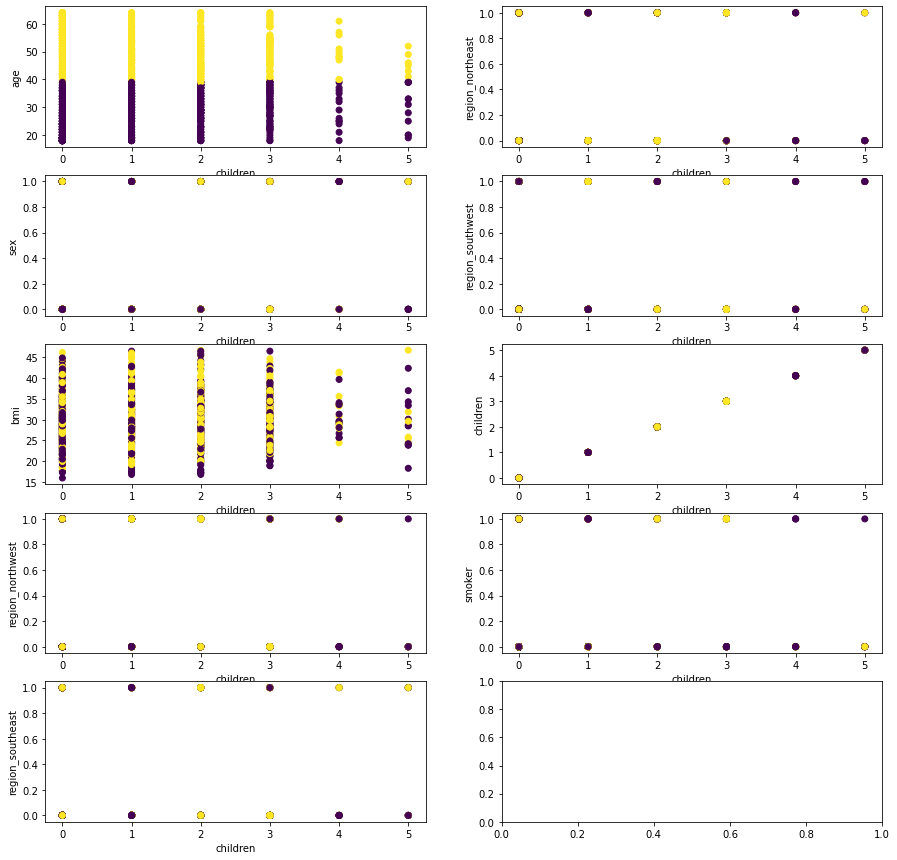

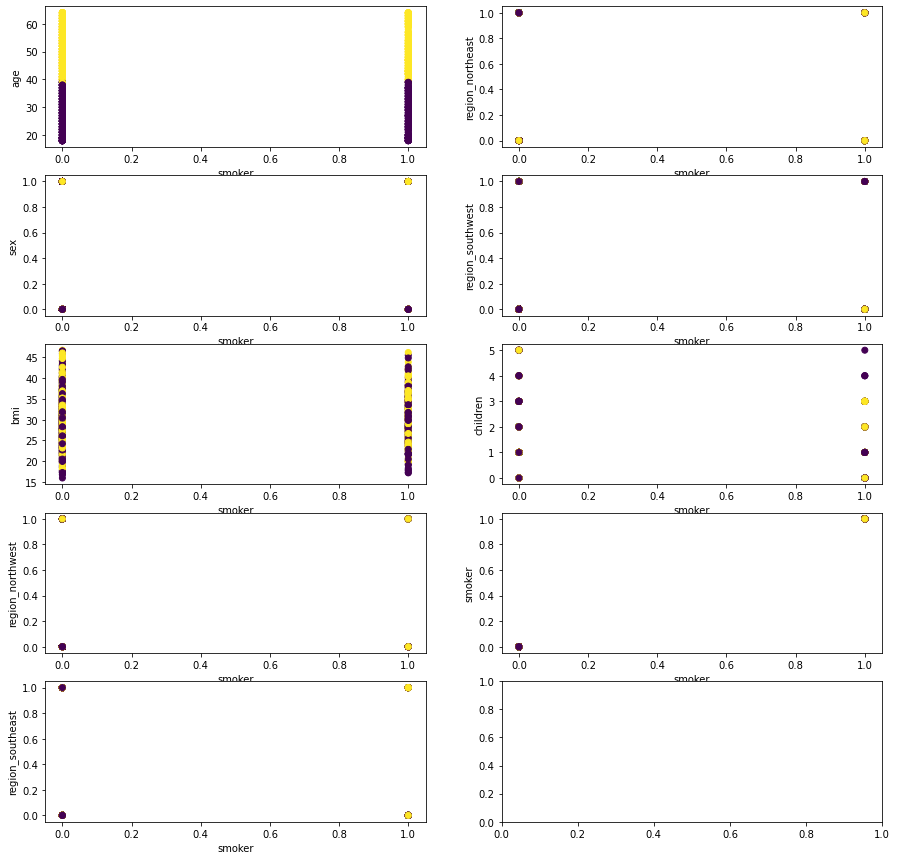

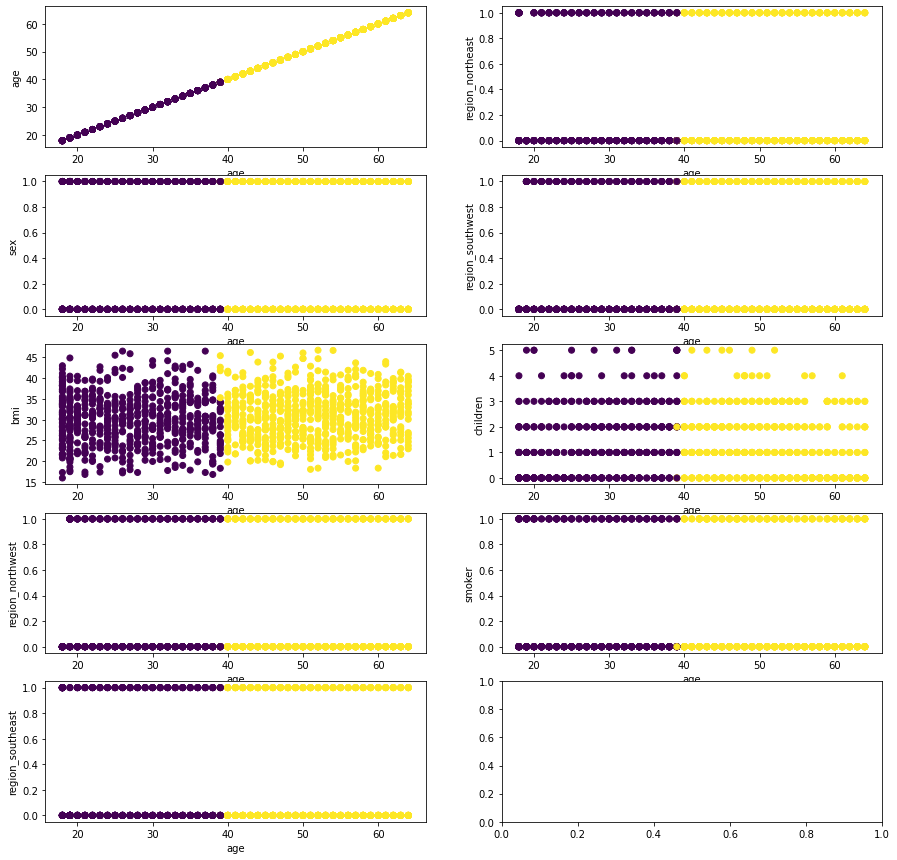

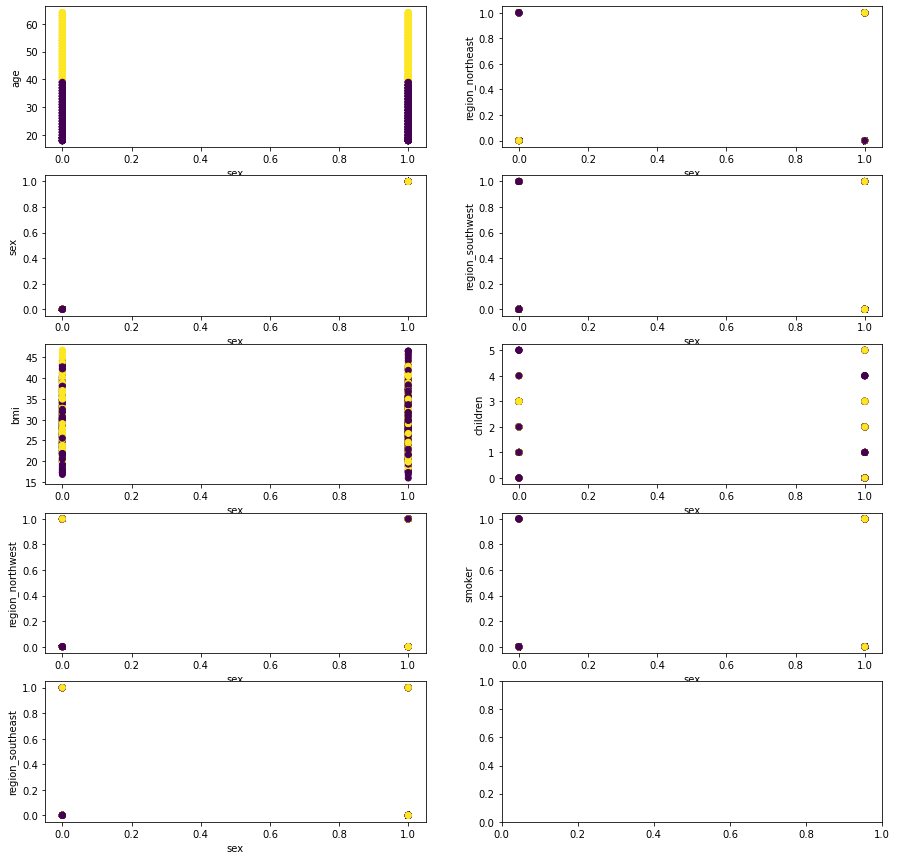

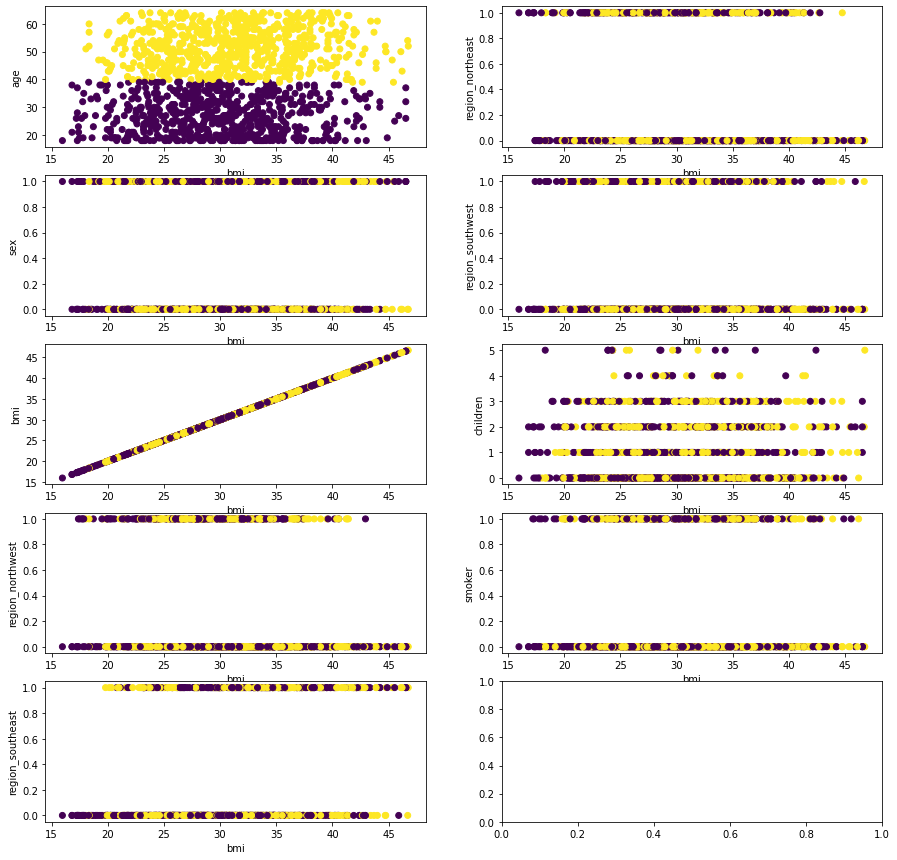

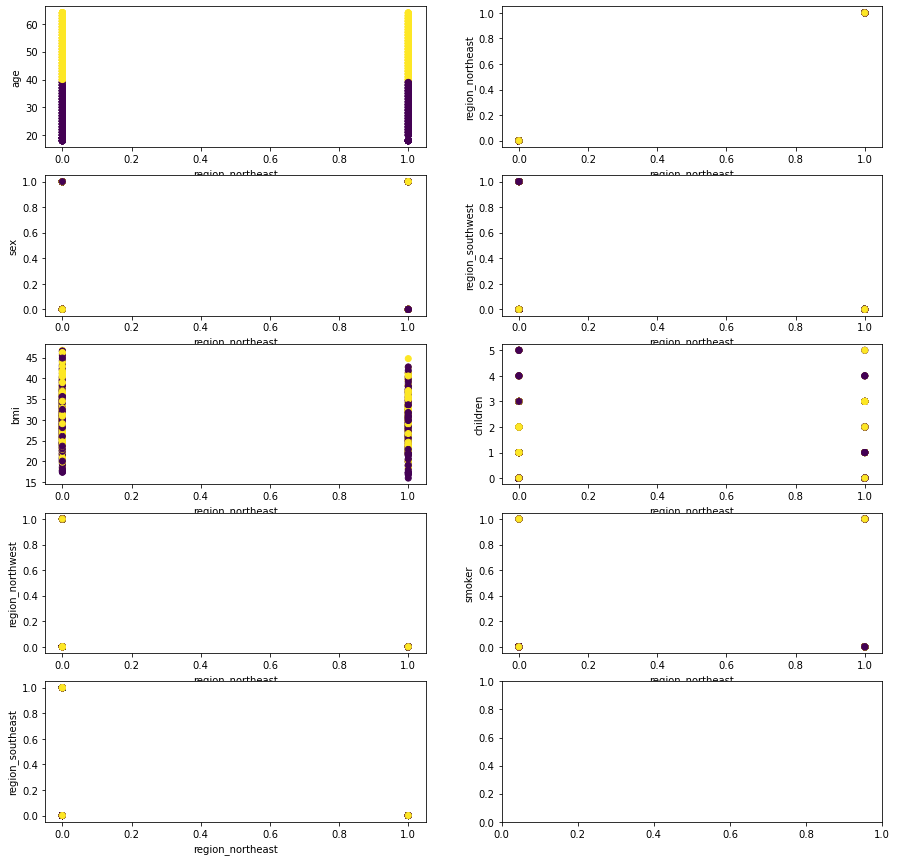

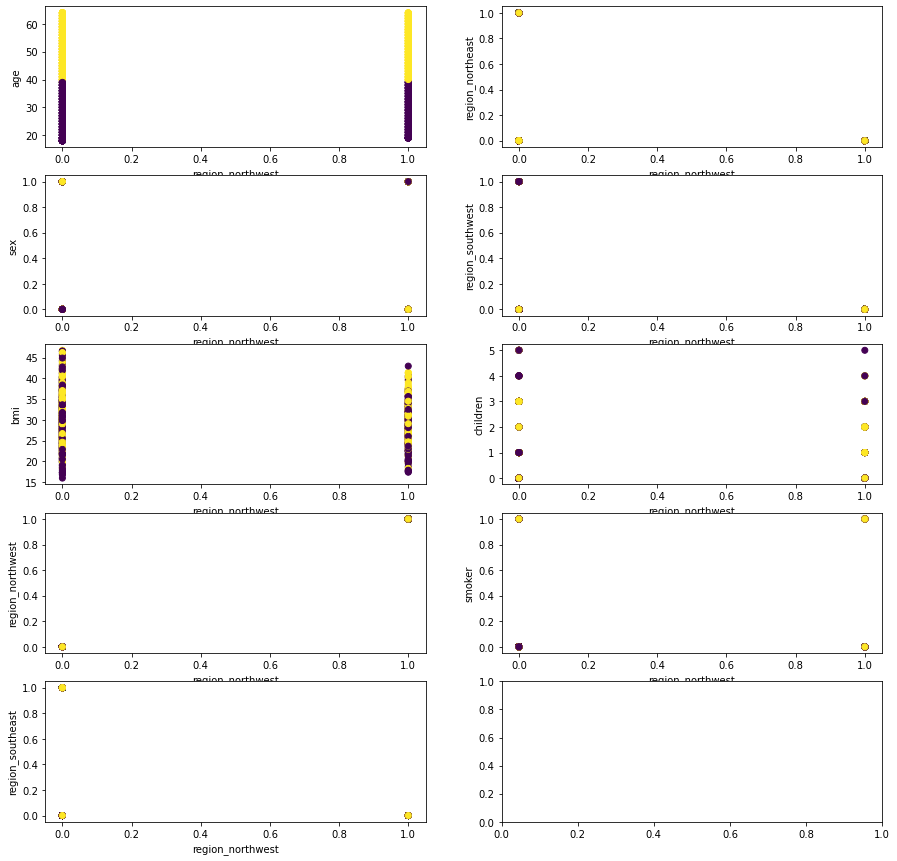

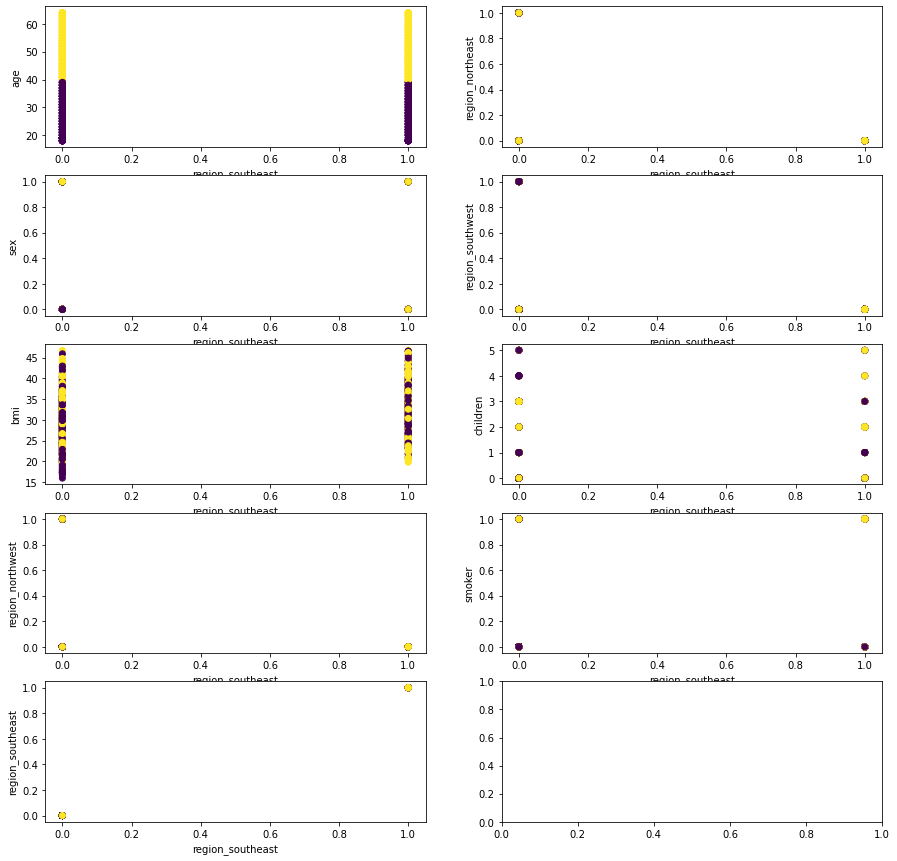

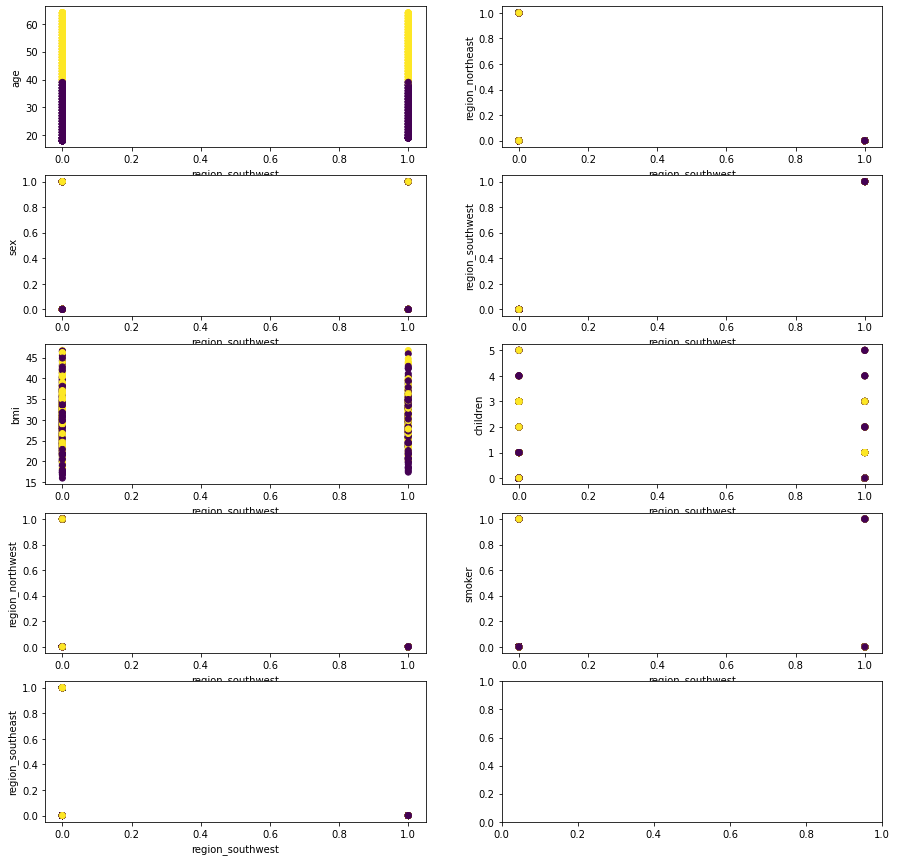

In [169]:
x = df.drop('charges in INR',axis=1)
for col in x.columns:
    clustering(x,col,cluster)

Analysis
- Age is forming clear cluster with all other independent variable

In [170]:
new_df = df.join(pd.DataFrame(cluster,columns=['cluster']), how = 'left')

In [171]:
new_df

,children,smoker,age,sex,bmi,charges in INR,region_northeast,region_northwest,region_southeast,region_southwest,cluster
0,0,0,23,1,34.400,1826.84300,0,0,0,1,0
1,1,0,19,1,24.600,1837.23700,0,0,0,1,0
2,0,0,56,1,40.300,10602.38500,0,0,0,1,1
3,1,0,30,0,32.400,4149.73600,0,0,0,1,0
4,5,0,19,0,28.600,4687.79700,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,1,1,39,1,29.925,22462.04375,1,0,0,0,0
1334,0,1,18,0,21.660,14283.45940,1,0,0,0,0
1335,2,1,42,1,24.605,21259.37795,1,0,0,0,1
1336,0,1,29,0,21.850,16115.30450,1,0,0,0,0


In [172]:
new_f = new_df.groupby('cluster')['age'].agg(['mean','median'])

In [173]:
new_f

,mean,median
cluster,,
0,26.977612,27.0
1,51.473054,51.0


In [174]:
cluster_df = new_df.merge(new_f, on = 'cluster', how = 'left')
cluster_df.head()

,children,smoker,age,sex,bmi,charges in INR,region_northeast,region_northwest,region_southeast,region_southwest,cluster,mean,median
0,0,0,23,1,34.4,1826.843,0,0,0,1,0,26.977612,27.0
1,1,0,19,1,24.6,1837.237,0,0,0,1,0,26.977612,27.0
2,0,0,56,1,40.3,10602.385,0,0,0,1,1,51.473054,51.0
3,1,0,30,0,32.4,4149.736,0,0,0,1,0,26.977612,27.0
4,5,0,19,0,28.6,4687.797,0,0,0,1,0,26.977612,27.0


### Model Evaluation On Cluster Dataset

In [177]:
Master_MB1 = pd.DataFrame(master_mb(cluster_df,'charges in INR'),columns=['Model Names','R2_Score']).sort_values(by=['R2_Score'],ascending = False)
Master_MB1 = Master_MB.reset_index(drop=True)
Master_MB1

ValueError: 2 columns passed, passed data had 3 columns

In [ ]:
kfoldCV(cluster_df.drop('charges in INR',axis=1),cluster_df['charges in INR'])

In [ ]:
CV_Post_HPT(cluster_df.drop('charges in INR',axis= 1),cluster_df['charges in INR'])